In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
body = client_e1abc.get_object(Bucket='predictingsalesperformancebasedof-donotdelete-pr-jfsywoclphtvfz',Key='Kaggle Anonymized Data 3.27.12 v4.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_excel(body)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2787 entries, 0 to 2786
Columns: 558 entries, Outcome_M1 to Cat_514
dtypes: datetime64[ns](1), float64(12), int64(532), object(13)
memory usage: 11.9+ MB


## 1. Pre-processing

Alter product features and target vairable in scope of the problem statement

In [31]:
fix = df.iloc[:,0:12].replace(0, np.nan)
fix.head()

,Outcome_M1,Outcome_M2,Outcome_M3,Outcome_M4,Outcome_M5,Outcome_M6,Outcome_M7,Outcome_M8,Outcome_M9,Outcome_M10,Outcome_M11,Outcome_M12
0,885000.0,305000.0,31000.0,31000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,795000.0,315000.0,61000.0,68000.0,35000.0,23000.0,21000.0,18000.0,8000.0,11000.0,5000.0,3000.0
2,677000.0,263000.0,53000.0,50000.0,37000.0,16000.0,13000.0,19000.0,21000.0,16000.0,13000.0,6000.0
3,534000.0,210000.0,27000.0,29000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,532000.0,69000.0,63000.0,119000.0,21000.0,16000.0,15000.0,8000.0,6000.0,8000.0,6000.0,6000.0


In [32]:
fix['Total Period Sales'] = fix.iloc[:,0:12].sum(axis='columns')
fix['Active Sales Months'] = fix.iloc[:,0:12].count(axis='columns')
fix.head()

,Outcome_M1,Outcome_M2,Outcome_M3,Outcome_M4,Outcome_M5,Outcome_M6,Outcome_M7,Outcome_M8,Outcome_M9,Outcome_M10,Outcome_M11,Outcome_M12,Total Period Sales,Active Sales Months
0,885000.0,305000.0,31000.0,31000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1252000.0,4
1,795000.0,315000.0,61000.0,68000.0,35000.0,23000.0,21000.0,18000.0,8000.0,11000.0,5000.0,3000.0,1363000.0,12
2,677000.0,263000.0,53000.0,50000.0,37000.0,16000.0,13000.0,19000.0,21000.0,16000.0,13000.0,6000.0,1184000.0,12
3,534000.0,210000.0,27000.0,29000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,800000.0,4
4,532000.0,69000.0,63000.0,119000.0,21000.0,16000.0,15000.0,8000.0,6000.0,8000.0,6000.0,6000.0,869000.0,12


In [33]:
fix = fix.drop(columns = fix.iloc[:,0:12])
fix.head()

,Total Period Sales,Active Sales Months
0,1252000.0,4
1,1363000.0,12
2,1184000.0,12
3,800000.0,4
4,869000.0,12


In [34]:
df = df.drop(columns = df.iloc[:,0:12])
df = fix.join(df)
df.columns = [x.strip() for x in df.columns] #remove spaces in column names

In [35]:
df.head()

,Total Period Sales,Active Sales Months,Cat_1,Quan_0,Quan_1,Quan_2,Quan_3,Quan_4,Date_4,Quan_5,...,Cat_505,Cat_506,Cat_507,Cat_508,Cat_509,Cat_510,Cat_511,Cat_512,Cat_513,Cat_514
0,1252000.0,4,1,3598,30595010,88.0,100.0,4.692569e+06,2010-03-02,172,...,0,0,0,1,0,0,0,0,0,1
1,1363000.0,12,1,3234,23512290,86.0,137.0,4.365238e+06,2009-05-13,204,...,0,0,0,1,0,1,0,0,0,1
2,1184000.0,12,1,2870,17295690,92.0,162.0,3.220430e+06,2008-09-16,MISSING,...,0,0,0,1,0,1,0,1,0,1
3,800000.0,4,2,3598,18954681,87.0,44.0,4.692569e+06,2010-03-02,143,...,0,0,0,1,0,0,0,0,0,1
4,869000.0,12,1,2093,6696225,93.0,141.0,1.297454e+06,2005-03-08,MISSING,...,0,0,0,1,0,1,2,0,0,1


In [36]:
df['Launch Month'] = df['Date_4'].dt.month #extract the launch month of the product
df = df.drop(columns = ['Date_4']) #unidentified date column according to data source, we will remove this

In [37]:
df.head()

,Total Period Sales,Active Sales Months,Cat_1,Quan_0,Quan_1,Quan_2,Quan_3,Quan_4,Quan_5,Quan_6,...,Cat_506,Cat_507,Cat_508,Cat_509,Cat_510,Cat_511,Cat_512,Cat_513,Cat_514,Launch Month
0,1252000.0,4,1,3598,30595010,88.0,100.0,4.692569e+06,172,80,...,0,0,1,0,0,0,0,0,1,3.0
1,1363000.0,12,1,3234,23512290,86.0,137.0,4.365238e+06,204,73,...,0,0,1,0,1,0,0,0,1,5.0
2,1184000.0,12,1,2870,17295690,92.0,162.0,3.220430e+06,MISSING,MISSING,...,0,0,1,0,1,0,1,0,1,9.0
3,800000.0,4,2,3598,18954681,87.0,44.0,4.692569e+06,143,68,...,0,0,1,0,0,0,0,0,1,3.0
4,869000.0,12,1,2093,6696225,93.0,141.0,1.297454e+06,MISSING,MISSING,...,0,0,1,0,1,2,0,0,1,3.0


Nan and Missing Columns

In [38]:
nan_columns = list(df.columns[df.isnull().any()])
missing_columns = list(df.columns[df.isin(['MISSING']).any()])
rouge_columns = nan_columns + missing_columns
df[rouge_columns] = df[rouge_columns].replace('MISSING', np.nan) #replace NaN values with the median of the column
df[rouge_columns] = df[rouge_columns].replace(np.nan, df.median(axis=0)) #replace NaN values with the median of the column

Identify True Binary Features

In [39]:
[col for col in df if np.isin(df[col].unique(), [0, 1]).all()][-15:] #list of last 15 columns with binary measure

['Cat_491',
 'Cat_492',
 'Cat_494',
 'Cat_498',
 'Quan_26',
 'Cat_503',
 'Cat_504',
 'Quan_30',
 'Cat_505',
 'Cat_506',
 'Cat_507',
 'Cat_508',
 'Cat_510',
 'Cat_512',
 'Cat_514']

In [40]:
X = df.iloc[:,1:549]
Y = df.iloc[:,0:1]

## 2. Model Developement

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (X, Y, test_size=0.3, random_state=0)

#### Feature Selection
We will utalize an OLS Backwards Elimination method

In [42]:
import statsmodels.api as sm
y = y_train
cols = list(x_train.columns)
pmax = 1
while (len(cols)>0):
    '''This automates the backwards elimination OLS method'''
    p = []
    X_1 = x_train[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[0:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print("Product features that have statistical significance on the outcome vairable: " + str(selected_features_BE))

/opt/conda/envs/Python36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/base/model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/opt/conda/envs/Python36/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/opt/conda/envs/Python36/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/opt/conda/envs/Python36/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Product features that have statistical significance on the outcome vairable: ['Active Sales Months', 'Quan_0', 'Quan_3', 'Quan_4', 'Quan_5', 'Quan_7', 'Quan_8', 'Quan_9', 'Quan_12', 'Cat_4', 'Cat_16', 'Quan_15', 'Cat_22', 'Cat_41', 'Cat_42', 'Cat_47', 'Cat_84', 'Quan_17', 'Quan_18', 'Cat_110', 'Cat_117', 'Cat_139', 'Cat_147', 'Cat_180', 'Cat_181', 'Cat_193', 'Cat_203', 'Cat_214', 'Cat_216', 'Cat_218', 'Cat_250', 'Cat_256', 'Cat_290', 'Cat_292', 'Cat_302', 'Cat_303', 'Cat_312', 'Cat_318', 'Cat_346', 'Cat_348', 'Cat_358', 'Cat_366', 'Cat_371', 'Cat_375', 'Cat_376', 'Cat_382', 'Quan_20', 'Cat_385', 'Cat_386', 'Cat_388', 'Cat_389', 'Cat_402', 'Cat_409', 'Cat_410', 'Cat_411', 'Cat_412', 'Cat_413', 'Cat_414', 'Cat_417', 'Cat_421', 'Cat_455', 'Cat_457', 'Quant_22', 'Cat_458', 'Cat_459', 'Cat_463', 'Cat_464', 'Cat_466', 'Cat_469', 'Cat_470', 'Cat_476', 'Cat_477', 'Cat_478', 'Cat_492', 'Cat_493', 'Cat_494', 'Cat_495', 'Cat_496', 'Cat_497', 'Cat_498', 'Cat_499', 'Cat_500', 'Quan_26', 'Cat_502', 

In [43]:
x_train = x_train.filter(items=selected_features_BE, axis=1) #our significant independant vairables only

Check for Multi-Coliniarity - An assumption of linear regression is for independant vairables to be uncorrelated from each other

Text(0.5, 1.0, 'Multi-Collinearity of Features')

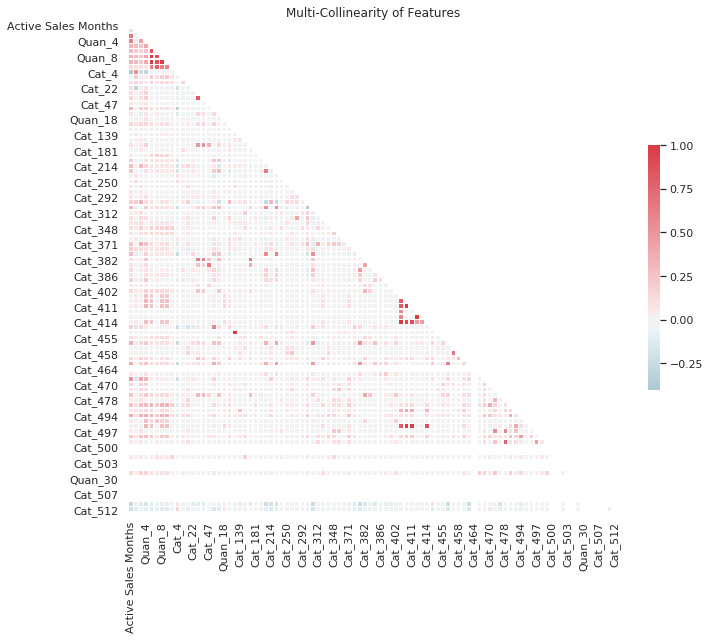

In [44]:
import seaborn as sns
sns.set(style="white")
# Create a covariance matrix
corr = x_train.corr()
# Creating a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11,9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10,as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap,vmax=1,center=0,square=True, 
            linewidth=.5, cbar_kws={'shrink': .5})
ax.set_title('Multi-Collinearity of Features')

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
[variance_inflation_factor(x_train.values, j) for j in range(x_train.shape[1])]

def calculate_vif(x):
    '''automate collinear feature elimination using VIF'''
    thresh = 10.0
    output = pd.DataFrame()
    k = x.shape[1]
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    for i in range(1,k):
        a = np.argmax(vif)
        if vif[a] <= thresh :
            break
        if i == 1 :          
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
        elif i > 1 :
            output = output.drop(output.columns[a],axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
    return(output)

selected_features = calculate_vif(x_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1543: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1543: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [46]:
x_train = selected_features
x_test = x_test.filter(items=x_train.columns, axis=1)

**Multi-linear Regression Model**

In [47]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(x_train)
y = np.asanyarray(y_train)
regr.fit (x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
y_pred = regr.predict(x_test)
x = np.asanyarray(x_test)
y_test_ = np.asanyarray(y_test)

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y_test_))

Variance score: 0.67


#### Gradient Boosting Model

In [49]:
from sklearn.ensemble import GradientBoostingRegressor
est = GradientBoostingRegressor(learning_rate=0.1)
model = est.fit(x_train, y_train)
y_hat = model.predict(x_test)

# Explained variance score: 1 is perfect prediction
from sklearn.metrics import r2_score, explained_variance_score
r2_score = r2_score(y_test_, y_hat)
print("R2: %.2f" % r2_score)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2: 0.81


## 3. Results

In [50]:
accuracy = [0.67, 0.81]
model = ['Multiple-Linear Regression', 'GBM']

Text(0.5, 1.0, 'Model Accuracy')

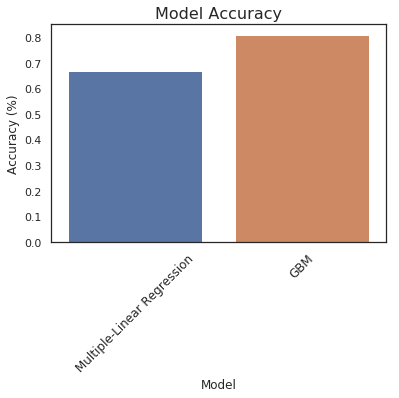

In [66]:
import seaborn as sns
sns.barplot(x=model, y=accuracy)
sns.set_palette('deep')
plt.ylabel('Accuracy (%)', size = 12)
plt.xlabel('Model', size = 12)
plt.xticks(size=12, rotation=45)
plt.title('Model Accuracy', size=16)

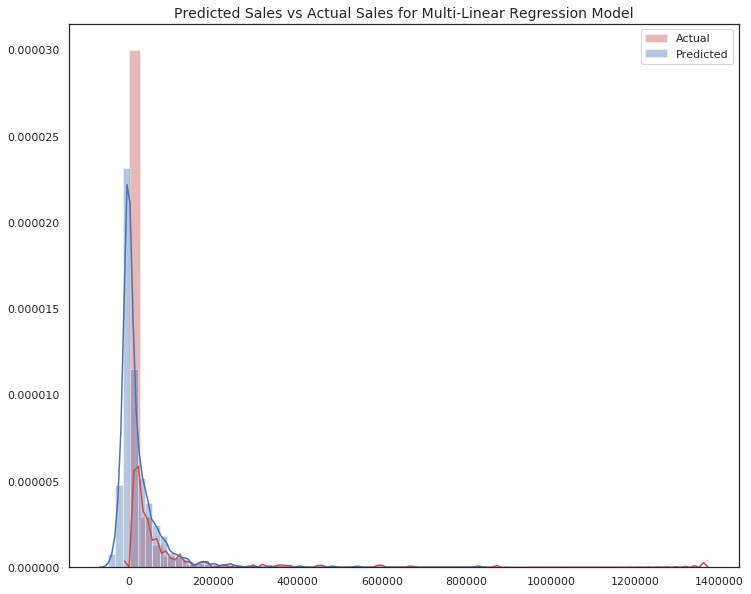

In [61]:
import seaborn as sns
from matplotlib import pyplot as plt

def DistributionPlot(y, yhat):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    ax1 = sns.distplot(y, hist=True, color="r", label='Actual')
    ax2 = sns.distplot(yhat, hist=True, color="b", label='Predicted', ax=ax1)
    plt.title('Predicted Sales vs Actual Sales for Multi-Linear Regression Model', size=14)
    plt.legend()
    plt.show()

DistributionPlot(y_test_, y_pred)

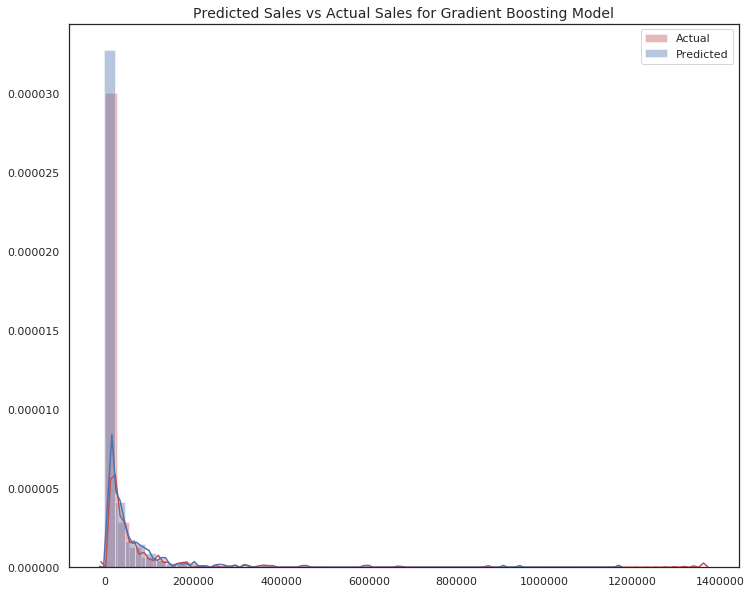

In [62]:
import seaborn as sns
from matplotlib import pyplot as plt

def DistributionPlot(y, yhat):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    ax1 = sns.distplot(y, hist=True, color="r", label='Actual')
    ax2 = sns.distplot(yhat, hist=True, color="b", label='Predicted', ax=ax1)
    plt.title('Predicted Sales vs Actual Sales for Gradient Boosting Model', size=14)
    plt.legend()
    plt.show()

DistributionPlot(y_test_, y_hat)